In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#import matplotlib.pylab as pylab
plt.rcParams['figure.figsize'] = 100, 100  # that's default image size for this 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import Counter
import copy
from itertools import chain
import psycopg2 as pgres
import pandas as pds
import re
import networkx as nx
import csv

    
class PSSEGraph(nx.Graph):
    def __init__(self, node_csv,network_csv):
        super(PSSEGraph, self).__init__()
        with open(node_csv,'r') as f:
            rows=csv.reader(f)
            rownum = 0
            for row in rows:
                #print(row)
                self.add_node(row[0])
                if len(row) > 1 :
                    if row[1]!='NA' and row[2]!='NA' :
                        self.node[row[0]]['pos'] = [row[1],row[2]]
                        self.node[row[0]]['color'] = 'b'
                    else :
                        self.node[row[0]]['color'] = 'r'
                rownum += 1
                    
        with open(network_csv,'r') as f:
            rows=csv.reader(f)
            #for row in rows:
                #print(row)
            #print rows
            self.add_edges_from(rows)


In [4]:
graph = PSSEGraph('buses.csv','network.csv')

print("number of nodes: {}".format(len(graph.nodes())))
print("number of connected components: {}".format(nx.number_connected_components(graph)))

component_num = 1
for g in nx.connected_components(graph):
    print("    a connected component has {} nodes".format(len(g)))
    print(g)
    for n in g:
        graph.node[n]['component'] = component_num
        
    component_num += 1


number of nodes: 1424
number of connected components: 2
    a connected component has 1421 nodes
{'228009', '238004', '166103', '161024', '166044', '114036', '114015', '224008', '244003', '164021', '164134', '245006', '145001', '116008', '134018', '255015', '134010', '168001', '164070', '138030', '161011', '115017', '136004', '164037', '161087', '225070', '255032', '164105', '234013', '114027', '225027', '124036', '161113', '125034', '164092', '124045', '225074', '235062', '139003', '166093', '118008', '125032', '166079', '114040', '114002', '254014', '161079', '245063', '166092', '164007', '254003', '115069', '118013', '161069', '164072', '164039', '164006', '115072', '134048', '135012', '121007', '133005', '161080', '234008', '235052', '244005', '166031', '161095', '161105', '245010', '245055', '145010', '135005', '145032', '254008', '245009', '166007', '164055', '224012', '161009', '115038', '148002', '245041', '245023', '225055', '136019', '161025', '161047', '164139', '138018', '1

In [ ]:
pos=nx.spring_layout(graph,
                     pos = nx.get_node_attributes(graph,'pos').values(),
                     fixed = nx.get_node_attributes(graph,'pos').keys(),
                     scale=1,
                     iterations = 500,
                     k=0.0001)
#nx.draw_networkx(graph,pos,with_labels=False,node_size=10,node_color = nx.get_node_attributes(graph,'color'))
print(graph.node['118002'])
print(pos['118002'])

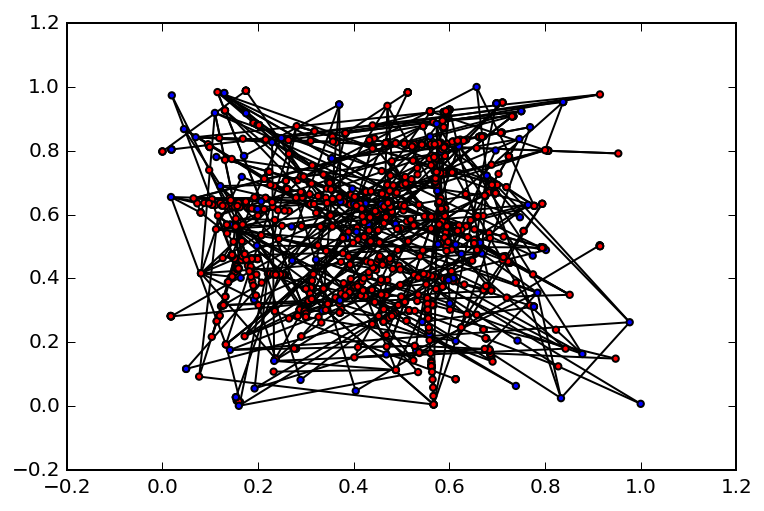

In [172]:
nx.draw_networkx(graph,pos,with_labels=False,node_size=10,node_color = nx.get_node_attributes(graph,'color').values())


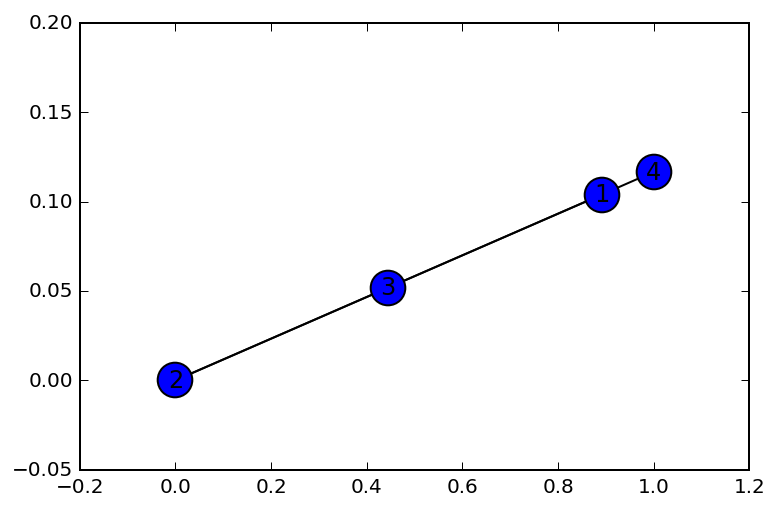

In [150]:
G=nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,1),(1,4)]) #define G
fixed_positions = {1:(120,14),2:(0,0)}#dict with two of the positions set
fixed_nodes = fixed_positions.keys()
p = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes,scale=1,k=0.1)
nx.draw_networkx(G,p,node_color='b')

In [97]:
from collections import defaultdict
def plot_multimode(m,layout=nx.spring_layout, type_string='type',filename_prefix='',output_type='pdf'):

    ## create a default color order and an empty color-map
    colors=['r','g','b','c','m','y','k']
    colormap={}
    d=nx.degree(m)  #we use degree for sizing nodes
    #pos=layout(m)  #compute layout
    pos=nx.spring_layout(graph,pos = nx.get_node_attributes(graph,'pos').values(),fixed = nx.get_node_attributes(graph,'pos').keys())

    #Now we need to find groups of nodes that need to be colored differently
    nodesets=defaultdict(list)
    for n in m.nodes():
        t=m.node[n][type_string]
        nodesets[t].append(n)

    ## Draw each group of nodes separately, using its own color settings
    print "drawing nodes..."
    i=0
    for key in nodesets.keys():
        ns=[d[n]*1 for n in nodesets[key]]
        nx.draw_networkx_nodes(m,pos,nodelist=nodesets[key], node_size=ns, 
                                node_color=colors[i], alpha=0.6)
        colormap[key]=colors[i]
        i+=1
        if i==len(colors):
            i=0  ### wrap around the colormap if we run out of colors
    print colormap

    ## Draw edges using a default drawing mechanism
    print "drawing edges..."
    nx.draw_networkx_edges(m,pos,width=0.5,alpha=0.5)
    #nx.draw_networkx_labels(m,pos,font_size=8)
    #plt.axis('off')
    figsize=(100,100)
    if filename_prefix is not '':
        plt.savefig(filename_prefix+'.'+output_type)

drawing nodes...
{1: 'r', 2: 'g'}
drawing edges...


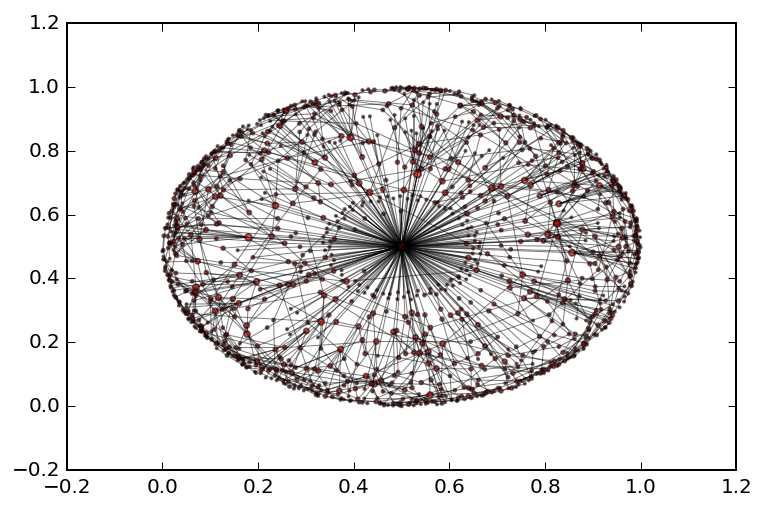

In [98]:
plot_multimode(graph,type_string='component',filename_prefix='PH')

In [6]:
graph.edges(data = True)

[('161079', '164092', {}),
 ('161079', '166037', {}),
 ('161078', '164091', {}),
 ('161078', '166035', {}),
 ('161075', '166041', {}),
 ('161075', '164088', {}),
 ('161074', '164086', {}),
 ('161074', '166002', {}),
 ('161077', '164090', {}),
 ('161077', '166035', {}),
 ('161076', '166035', {}),
 ('161076', '164089', {}),
 ('161071', '164083', {}),
 ('161071', '166057', {}),
 ('161070', '166013', {}),
 ('161070', '164082', {}),
 ('161073', '164085', {}),
 ('161073', '166002', {}),
 ('161072', '164084', {}),
 ('161072', '166057', {}),
 ('135030', '135009', {}),
 ('124009', '125022', {}),
 ('124008', '128001', {}),
 ('124003', '128014', {}),
 ('124003', '124004', {}),
 ('124002', '126003', {}),
 ('124001', '126001', {}),
 ('124007', '128001', {}),
 ('124006', '128002', {}),
 ('124005', '128002', {}),
 ('124004', '128014', {}),
 ('118022', '118020', {}),
 ('118022', '114011', {}),
 ('118022', '114010', {}),
 ('118023', '118020', {}),
 ('118023', '114042', {}),
 ('118023', '114020', {}),
 